In [2]:
!python --version

Python 3.8.3


In [3]:
!tree ../

Folder PATH listing for volume Windows-SSD
Volume serial number is 4E8F-7E1C
C:\USERS\SIVAI\DESKTOP\RECOMMENDEDSYSTEMS\
Invalid path - \USERS\SIVAI\DESKTOP\RECOMMENDEDSYSTEMS\
No subfolders exist 



In [4]:
from pathlib import Path
import pandas as pd

In [5]:
DATA_DIR = Path('../data/movielens/ml-latest')

RATINGS_FILEPATH = DATA_DIR / 'ratings.csv'
MOVIES_FILPATH = DATA_DIR / 'movies.csv'

# Ratings

In [6]:
ratings_raw = pd.read_csv(RATINGS_FILEPATH)
ratings_raw.sample(5)

,userId,movieId,rating,timestamp
15738443,160748,1704,5.0,1493388306
17339014,177122,318,4.0,834162070
3113815,32059,68793,4.0,1530962667
27282398,278395,101864,5.0,1440103141
23690581,242058,86911,4.0,1341034797


In [7]:
ratings = ratings_raw.copy()

In [8]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27753444 entries, 0 to 27753443
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 847.0 MB


In [9]:
ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [10]:
ratings.duplicated(keep=False).sum()

0

# Movies

In [11]:
movies_raw = pd.read_csv(MOVIES_FILPATH)
movies_raw.sample(5)

,movieId,title,genres
1147,1170,Best of the Best 3: No Turning Back (1995),Action
2351,2435,Hurlyburly (1998),Drama
4780,4875,On the Line (2001),Comedy|Romance
58042,193769,A Boy. A Girl. A Dream: Love on Election Night...,Romance
4536,4630,No Holds Barred (1989),Action


In [12]:
movies = movies_raw.copy()

In [13]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58098 entries, 0 to 58097
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  58098 non-null  int64 
 1   title    58098 non-null  object
 2   genres   58098 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.3+ MB


In [14]:
movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [15]:
movies.duplicated().sum()

0

**Title + genre**

In [16]:
movies.duplicated(subset=['title', 'genres']).sum()

14

In [17]:
duplicates = movies[movies.duplicated(subset=['title', 'genres'], keep=False)]
duplicates

,movieId,title,genres
2560,2644,Dracula (1931),Horror
11173,46865,Little Man (2006),Comedy
11412,48682,Offside (2006),Comedy|Drama
13504,66511,Berlin Calling (2008),Comedy|Drama
14038,70155,Seven Years Bad Luck (1921),Comedy
15637,79254,Home (2008),Drama
15902,80330,Offside (2006),Comedy|Drama
18867,93279,Darling (2007),Drama
19914,97773,"Girl, The (2012)",Drama
20835,101212,"Girl, The (2012)",Drama


In [18]:
duplicates.title.values

array(['Dracula (1931)', 'Little Man (2006)', 'Offside (2006)',
       'Berlin Calling (2008)', 'Seven Years Bad Luck (1921)',
       'Home (2008)', 'Offside (2006)', 'Darling (2007)',
       'Girl, The (2012)', 'Girl, The (2012)', 'Beneath (2013)',
       'Clear History (2013)', 'Johnny Express (2014)', 'Beneath (2013)',
       'Clear History (2013)', 'Johnny Express (2014)', 'Darling (2007)',
       'Macbeth (2015)', 'Home (2008)', 'Macbeth (2015)',
       'Seven Years Bad Luck (1921)', 'Detour (2017)',
       'Little Man (2006)', 'Lucky (2017)', 'Dracula (1931)',
       'Lucky (2017)', 'Detour (2017)', 'Berlin Calling (2008)'],
      dtype=object)

In [19]:
for movie_title in duplicates.title.unique():
    display(movies[movies.title == movie_title])

,movieId,title,genres
2560,2644,Dracula (1931),Horror
52192,180205,Dracula (1931),Horror


,movieId,title,genres
11173,46865,Little Man (2006),Comedy
48620,172427,Little Man (2006),Comedy


,movieId,title,genres
11412,48682,Offside (2006),Comedy|Drama
15902,80330,Offside (2006),Comedy|Drama


,movieId,title,genres
13504,66511,Berlin Calling (2008),Comedy|Drama
57269,191775,Berlin Calling (2008),Comedy|Drama


,movieId,title,genres
14038,70155,Seven Years Bad Luck (1921),Comedy
44387,163246,Seven Years Bad Luck (1921),Comedy


,movieId,title,genres
15637,79254,Home (2008),Drama
36172,143978,Home (2008),Drama


,movieId,title,genres
18867,93279,Darling (2007),Drama
30226,130062,Darling (2007),Drama


,movieId,title,genres
19914,97773,"Girl, The (2012)",Drama
20835,101212,"Girl, The (2012)",Drama


,movieId,title,genres
21655,104035,Beneath (2013),Horror
25046,115777,Beneath (2013),Horror


,movieId,title,genres
21691,104155,Clear History (2013),Comedy
27572,122940,Clear History (2013),Comedy


,movieId,title,genres
23834,111519,Johnny Express (2014),Animation|Comedy|Sci-Fi
29852,128991,Johnny Express (2014),Animation|Comedy|Sci-Fi


,movieId,title,genres
33001,136564,Macbeth (2015),Drama
38804,150310,Macbeth (2015),Drama


,movieId,title,genres
46904,168774,Detour (2017),Thriller
52795,181655,Detour (2017),Thriller


,movieId,title,genres
51339,178401,Lucky (2017),Drama
52644,181329,Lucky (2017),Drama


In [20]:
ratings[ratings.movieId == 46865]

,userId,movieId,rating,timestamp
34191,332,46865,2.5,1160367907
124859,1215,46865,1.0,1185238454
227128,2231,46865,0.5,1191651526
413108,4208,46865,4.0,1221509439
475122,4836,46865,0.5,1342553315
...,...,...,...,...
27534644,280901,46865,4.0,1220666505
27555788,281096,46865,0.5,1166033444
27588229,281499,46865,1.5,1372546405
27661277,282242,46865,2.0,1325466212


In [21]:
ratings = ratings_raw.copy()

In [22]:
def replace_movie_id_in_rating_dataframe(dataframe: pd.DataFrame, new_movie_id: int, old_movie_id: int) \
    -> pd.DataFrame:
    dataframe.loc[dataframe.movieId == old_movie_id, 'movieId'] = new_movie_id
    return dataframe

ratings = replace_movie_id_in_rating_dataframe(ratings, 46865, 172427)

In [23]:
(ratings.movieId == 172427).sum()

0

In [24]:
def remove_old_movie_ids_from_movies_dataframe(dataframe: pd.DataFrame, old_movie_ids: [int]) -> pd.DataFrame:
    target_index = dataframe[dataframe.movieId.isin(old_movie_ids)].index
    dataframe = dataframe.drop(target_index)
    return dataframe

remove_old_movie_ids_from_movies_dataframe(movies, [1, 2, 3, 4])

,movieId,title,genres
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
...,...,...,...
58093,193876,The Great Glinka (1946),(no genres listed)
58094,193878,Les tribulations d'une caissière (2011),Comedy
58095,193880,Her Name Was Mumu (2016),Drama
58096,193882,Flora (2017),Adventure|Drama|Horror|Sci-Fi


In [25]:
def f(movies_dataframe: pd.DataFrame, ratings_dataframe: pd.DataFrame) -> (pd.DataFrame, pd.DataFrame):
    duplicates = movies_dataframe[movies_dataframe.duplicated(subset=['title', 'genres'], keep=False)]
    old_movie_ids = []
    for movie_title in duplicates.title.unique():
        movie_ids = duplicates[duplicates.title == movie_title].movieId.values
        new_movie_id, old_movie_id = movie_ids
        ratings_dataframe = replace_movie_id_in_rating_dataframe(ratings_dataframe, new_movie_id, old_movie_id)
        old_movie_ids.append(old_movie_id)
    movies_dataframe = remove_old_movie_ids_from_movies_dataframe(movies_dataframe, old_movie_ids)
    return movies_dataframe, ratings_dataframe

In [26]:
movies_df, ratings_df = f(movies, ratings)

In [27]:
len(movies_raw) - len(movies_df)

14

In [28]:
len(ratings_raw) - len(ratings_df)

0

**Title**

In [29]:
movies.title.duplicated().sum()

78

In [30]:
movies[movies.title.duplicated(keep=False)]

,movieId,title,genres
582,588,Aladdin (1992),Adventure|Animation|Children|Comedy|Musical
823,838,Emma (1996),Comedy|Drama|Romance
1716,1788,Men with Guns (1997),Action|Drama
2560,2644,Dracula (1931),Horror
2766,2851,Saturn 3 (1980),Adventure|Sci-Fi|Thriller
...,...,...,...
57269,191775,Berlin Calling (2008),Comedy|Drama
57305,191867,Let There Be Light (2017),Documentary
57361,192003,Journey to the Center of the Earth (2008),Action|Adventure|Fantasy|Sci-Fi
57463,192243,Contact (1992),Drama|Horror|Mystery|Thriller


In [31]:
movies[movies.title == 'Berlin Calling (2008)']

,movieId,title,genres
13504,66511,Berlin Calling (2008),Comedy|Drama
57269,191775,Berlin Calling (2008),Comedy|Drama


# Now, let's explore ratings_raw dataframe

In [33]:
ratings_raw.rating.describe()

count    2.775344e+07
mean     3.530445e+00
std      1.066353e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

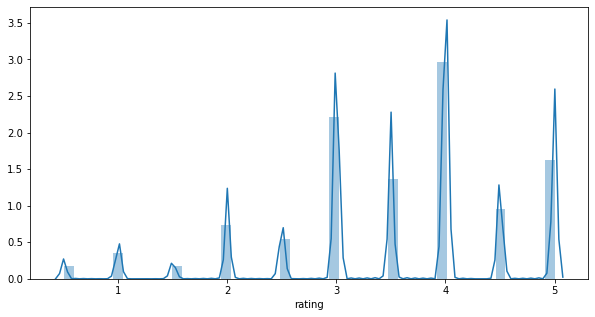

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,5))
sns.distplot(ratings_raw.rating)

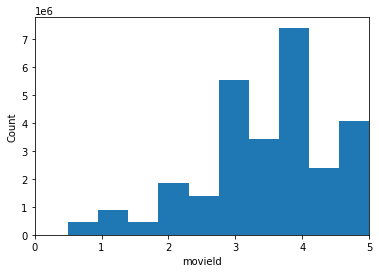

In [39]:
plt.hist(ratings_raw['rating'])
plt.xlabel('movieId')
plt.ylabel('Count')
plt.xlim((0, 5))
plt.show()

Mostly users have given the 4 as a rating 

In [52]:
print('The number of movies which are rated by users : {}'.format(len(ratings_raw['movieId'].unique())))

The number of movies which are rated by users : 53889


# Average rating.

In [53]:
d=ratings_raw.groupby('movieId').mean()['rating']
df=pd.DataFrame(d, columns=['rating']).reset_index()
df.head()

,movieId,rating
0,1,3.886649
1,2,3.246583
2,3,3.173981
3,4,2.874540
4,5,3.077291


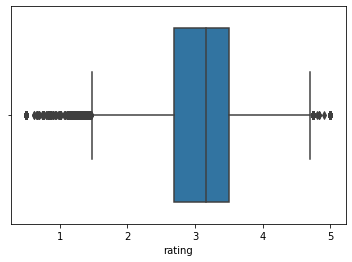

In [55]:
sns.boxplot(df['rating'], orient='h')

75% movies have rating less than around 3.5

In [56]:
print('Max rating : {}  Min rating : {}'.format(df['rating'].max(), df['rating'].min()))

Max rating : 5.0  Min rating : 0.5


#  Extract the year from title and make it as a new variable

In [94]:
data=pd.merge(movies_raw, df, on='movieId', how='left' )
data['year'] =data['title'].str.extract('.*\((.*)\).*',expand = False)
data.head(5)

,movieId,title,genres,rating,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.886649,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.246583,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,3.173981,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.874540,1995
4,5,Father of the Bride Part II (1995),Comedy,3.077291,1995


In [95]:
data['year'].isnull().sum()

322

In [107]:
data['year'].isnull().describe()

count     58098
unique        2
top       False
freq      57774
Name: year, dtype: object

322 movies doesn't have the year

In [117]:
sns.boxplot(df2['Year'].dropna().astype('int64'), orient='v')


ValueError: invalid literal for int() with base 10: 'Your Past Is Showing'

In [118]:
sns.distplot(data['year'].dropna().astype('int64'))

ValueError: invalid literal for int() with base 10: 'Your Past Is Showing'